# Perceptron Algorithm

In [1]:
import matplotlib.pyplot as plt

In [2]:
S = (((0,2), 1), ((1,-1), 1), ((-3,-2),-1), ((-1, 3), -1))

Sx_1_pos = []
Sx_2_pos = []
Sx_1_neg = []
Sx_2_neg = []

for i in range(len(S)):
    if S[i][1] == 1:
        Sx_1_pos.append(S[i][0][0])
        Sx_2_pos.append(S[i][0][1])
    else:
        Sx_1_neg.append(S[i][0][0])
        Sx_2_neg.append(S[i][0][1])

def plot_homogeneous_iteration(x, y):
    
    plt.figure(figsize=(5,5))
    plt.grid('true')                                   # gridlines
    plt.plot([-10,10],[0,0],'black')                   # x-axis
    plt.plot([0,0],[-10,10],'black')                   # y-axis
    plt.plot(x, y, 'bo')                               # w endpoint
    plt.plot([0,x], [0,y], 'b-')                       # w
    if y !=0: plt.plot([-10,10],[10*x/y,-10*x/y],'b-') # normal hyperplane to w
    plt.plot(Sx_1_pos, Sx_2_pos, 'go')                 # positive examples
    plt.plot(Sx_1_neg, Sx_2_neg, 'ro')                 # negative examples
    
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    #plt.axis('equal')

def homogeneous_perceptron(S):
    
    w = (0,0) # Initialise w^(1) = (0,...,0)
    exists = True
    
    while True: # for t = 1,2,...
        exists = False
        for i in range(len(S)): # check for existence of i s.t. y_i⟨w^(t), x_i⟩ <= 0
            if S[i][1]*((w[0]*S[i][0][0]) + w[1]*S[i][0][1]) <= 0:          # y_i⟨w^(t), x_i⟩ <= 0
                print("/\\ /\\ /\\ Using w = " + str(w) + ", point: (" + str(S[i][0][0]) + ', ' + str(S[i][0][1]) + ') is misclassified /\\ /\\ /\\')
                w = (w[0]+(S[i][1]*S[i][0][0]), w[1]+(S[i][1]*S[i][0][1]))  # w^(t+1) = w^(t) + y_i*x_i
                exists = True
                break
        #print(str(w) +  " = (" + str(t[0]) + " + " + str(S[i][1]*S[i][0][0]) + ", " + str(t[1]) + " + " + str(S[i][1]*S[i][0][1]) + ")")
        plot_homogeneous_iteration(w[0], w[1])
        plt.show()
        if exists == False: return w

/\ /\ /\ Using w = (0, 0), point: (0, 2) is misclassified /\ /\ /\


/Users/pete/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


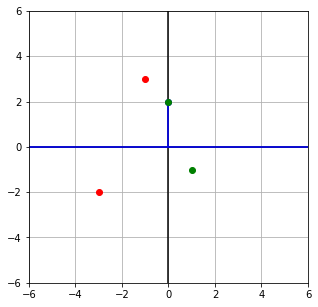

/\ /\ /\ Using w = (0, 2), point: (1, -1) is misclassified /\ /\ /\


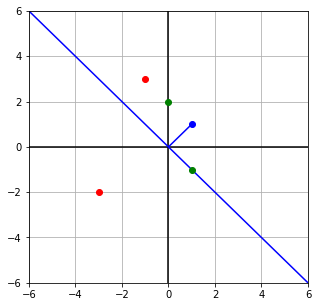

/\ /\ /\ Using w = (1, 1), point: (1, -1) is misclassified /\ /\ /\


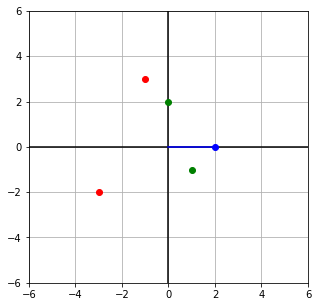

/\ /\ /\ Using w = (2, 0), point: (0, 2) is misclassified /\ /\ /\


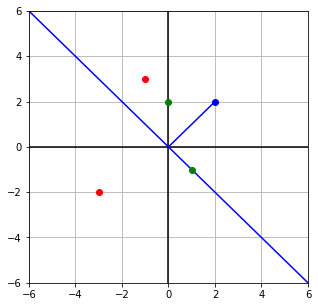

/\ /\ /\ Using w = (2, 2), point: (1, -1) is misclassified /\ /\ /\


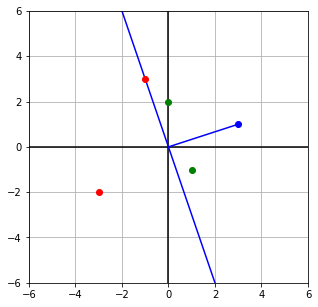

/\ /\ /\ Using w = (3, 1), point: (-1, 3) is misclassified /\ /\ /\


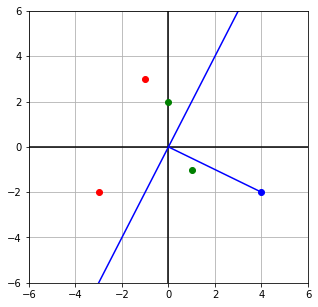

/\ /\ /\ Using w = (4, -2), point: (0, 2) is misclassified /\ /\ /\


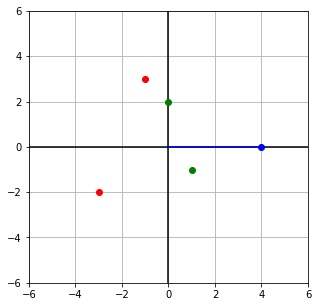

/\ /\ /\ Using w = (4, 0), point: (0, 2) is misclassified /\ /\ /\


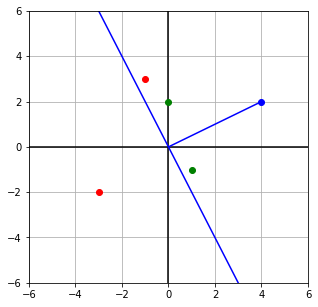

/\ /\ /\ Using w = (4, 2), point: (-1, 3) is misclassified /\ /\ /\


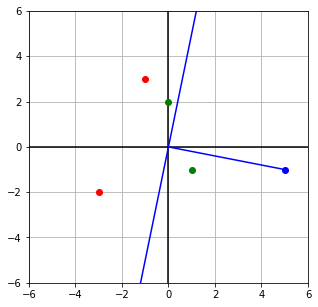

/\ /\ /\ Using w = (5, -1), point: (0, 2) is misclassified /\ /\ /\


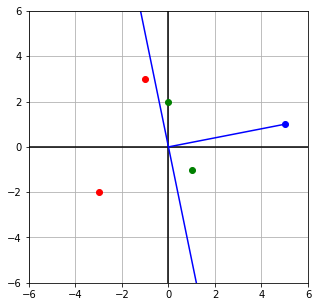

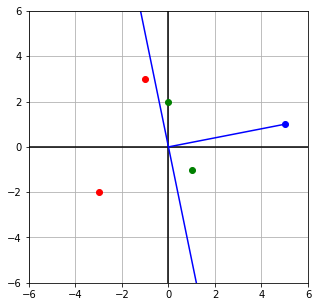

(5, 1)

In [3]:
homogeneous_perceptron(S)

In [4]:
S = (((1,3,1), 1), ((1,1,3), 1), ((1,5,2),-1), ((1,2, -3), -1))

Sx_1_pos = []
Sx_2_pos = []
Sx_1_neg = []
Sx_2_neg = []

for i in range(len(S)):
    if S[i][1] == 1:
        Sx_1_pos.append(S[i][0][1])
        Sx_2_pos.append(S[i][0][2])
    else:
        Sx_1_neg.append(S[i][0][1])
        Sx_2_neg.append(S[i][0][2])

def plot_inhomogeneous_iteration(b, x, y):
    
    a = 15 #plotting scale
    
    plt.figure(figsize=(5,5))
    plt.grid('true')
    plt.plot([-a,a],[0,0],'black')
    plt.plot([0,0],[-a,a],'black')
    if y!= 0: plt.plot([0,x], [-b/y,-b/y + y], 'b-')       # w acting from (0, -b/y)
    if y!= 0: plt.plot(x, -b/y + y, 'bo')                  # endpoint of w acting from (0, -b/y)
    if y !=0: plt.plot([-a,a],[a*x/y-b/y,-a*x/y-b/y],'b-') # normal hyperplane to w
    plt.plot(Sx_1_pos, Sx_2_pos, 'go')
    plt.plot(Sx_1_neg, Sx_2_neg, 'ro')
    
    plt.xlim(-a/2,a/2)
    plt.ylim(-a/2,a/2)
    
def inhomogeneous_perceptron(S):
    
    w = (0,0,0) # Initialise w^(1) = (0,...,0)
    exists = True
    
    while True: # for t = 1,2,...
        exists = False
        for i in range(len(S)): # check for existence of i s.t. y_i⟨w^(t), x_i⟩ <= 0
            if S[i][1]*((w[0]*S[i][0][0]) + w[1]*S[i][0][1] + w[2]*S[i][0][2]) <= 0:          # y_i⟨w^(t), x_i⟩ <= 0
                print("/\\ /\\ /\\ Using w = " + str(w) + ", point: (" + str(S[i][0][0]) + ', ' + str(S[i][0][1]) + ', ' + str(S[i][0][2]) + ') is misclassified /\\ /\\ /\\')
                w = (w[0]+(S[i][1]*S[i][0][0]), w[1]+(S[i][1]*S[i][0][1]), w[2]+(S[i][1]*S[i][0][2]))  # w^(t+1) = w^(t) + y_i*x_i
                exists = True
                break
        #print(str(w) +  " = (" + str(t[0]) + " + " + str(S[i][1]*S[i][0][0]) + ", " + str(t[1]) + " + " + str(S[i][1]*S[i][0][1]) + ")")
        plot_inhomogeneous_iteration(w[0], w[1], w[2])
        plt.show()
        if exists == False: return w

/\ /\ /\ Using w = (0, 0, 0), point: (1, 3, 1) is misclassified /\ /\ /\


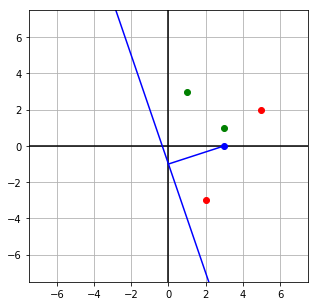

/\ /\ /\ Using w = (1, 3, 1), point: (1, 5, 2) is misclassified /\ /\ /\


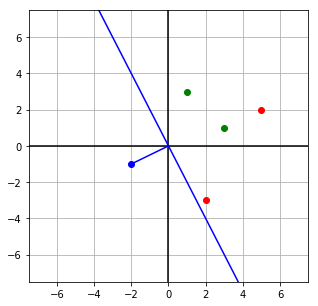

/\ /\ /\ Using w = (0, -2, -1), point: (1, 3, 1) is misclassified /\ /\ /\


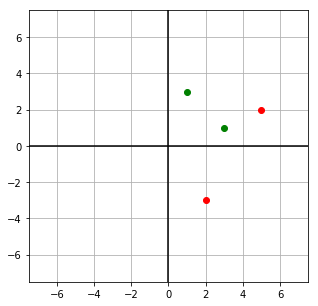

/\ /\ /\ Using w = (1, 1, 0), point: (1, 5, 2) is misclassified /\ /\ /\


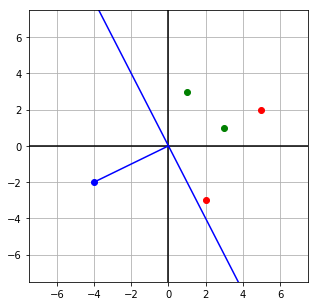

/\ /\ /\ Using w = (0, -4, -2), point: (1, 3, 1) is misclassified /\ /\ /\


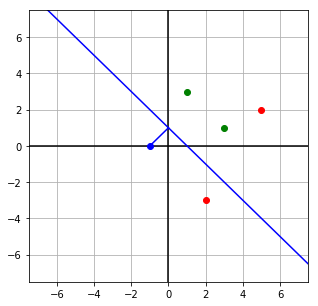

/\ /\ /\ Using w = (1, -1, -1), point: (1, 3, 1) is misclassified /\ /\ /\


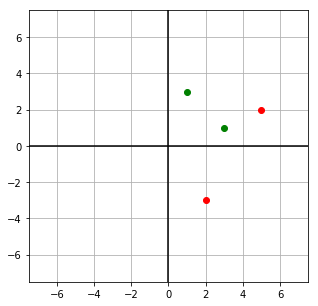

/\ /\ /\ Using w = (2, 2, 0), point: (1, 5, 2) is misclassified /\ /\ /\


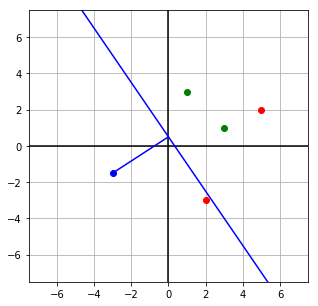

/\ /\ /\ Using w = (1, -3, -2), point: (1, 3, 1) is misclassified /\ /\ /\


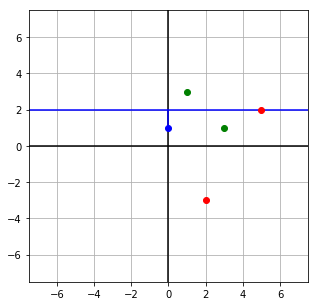

/\ /\ /\ Using w = (2, 0, -1), point: (1, 1, 3) is misclassified /\ /\ /\


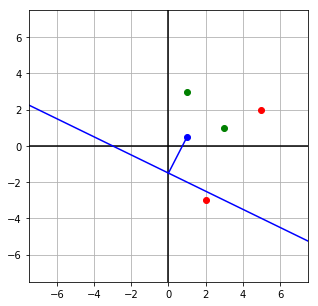

/\ /\ /\ Using w = (3, 1, 2), point: (1, 5, 2) is misclassified /\ /\ /\


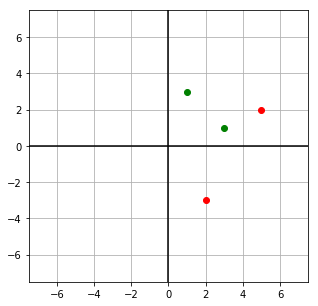

/\ /\ /\ Using w = (2, -4, 0), point: (1, 3, 1) is misclassified /\ /\ /\


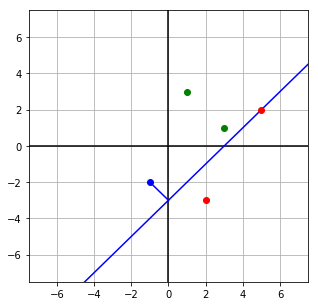

/\ /\ /\ Using w = (3, -1, 1), point: (1, 5, 2) is misclassified /\ /\ /\


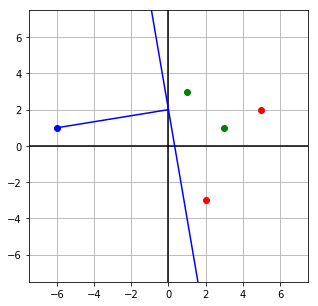

/\ /\ /\ Using w = (2, -6, -1), point: (1, 3, 1) is misclassified /\ /\ /\


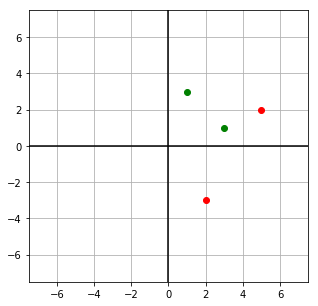

/\ /\ /\ Using w = (3, -3, 0), point: (1, 3, 1) is misclassified /\ /\ /\


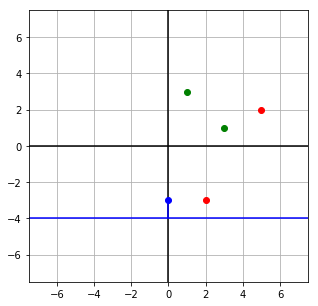

/\ /\ /\ Using w = (4, 0, 1), point: (1, 5, 2) is misclassified /\ /\ /\


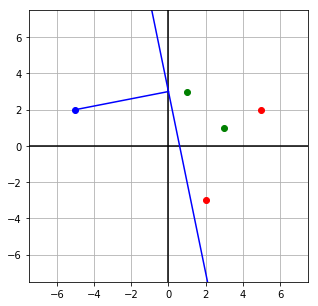

/\ /\ /\ Using w = (3, -5, -1), point: (1, 3, 1) is misclassified /\ /\ /\


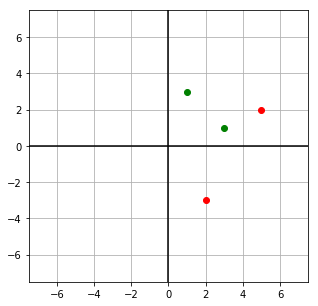

/\ /\ /\ Using w = (4, -2, 0), point: (1, 3, 1) is misclassified /\ /\ /\


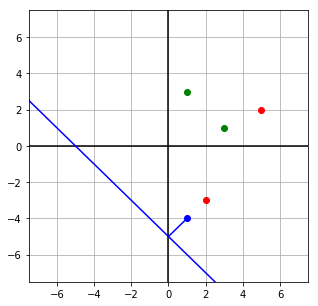

/\ /\ /\ Using w = (5, 1, 1), point: (1, 5, 2) is misclassified /\ /\ /\


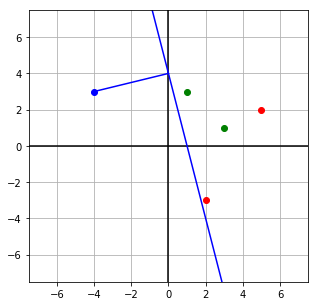

/\ /\ /\ Using w = (4, -4, -1), point: (1, 3, 1) is misclassified /\ /\ /\


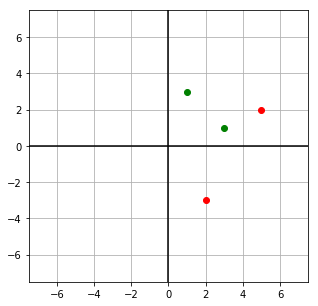

/\ /\ /\ Using w = (5, -1, 0), point: (1, 5, 2) is misclassified /\ /\ /\


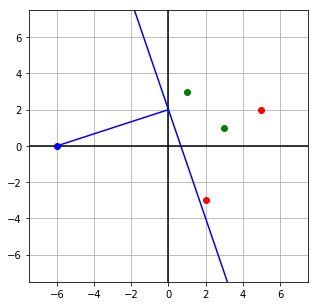

/\ /\ /\ Using w = (4, -6, -2), point: (1, 3, 1) is misclassified /\ /\ /\


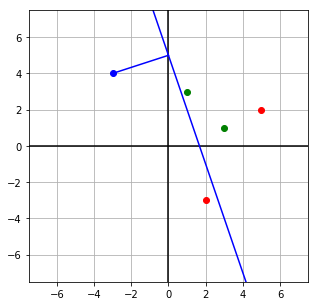

/\ /\ /\ Using w = (5, -3, -1), point: (1, 3, 1) is misclassified /\ /\ /\


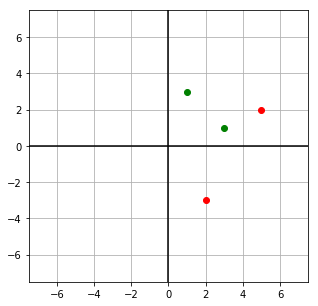

/\ /\ /\ Using w = (6, 0, 0), point: (1, 5, 2) is misclassified /\ /\ /\


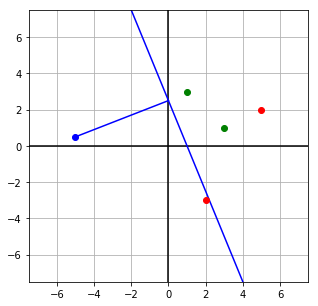

/\ /\ /\ Using w = (5, -5, -2), point: (1, 3, 1) is misclassified /\ /\ /\


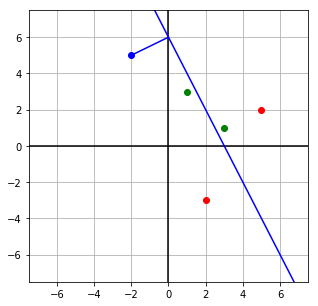

/\ /\ /\ Using w = (6, -2, -1), point: (1, 3, 1) is misclassified /\ /\ /\


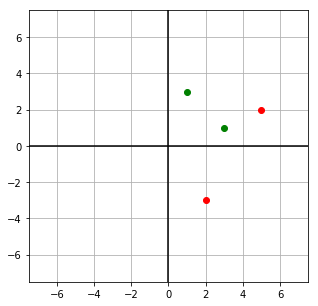

/\ /\ /\ Using w = (7, 1, 0), point: (1, 5, 2) is misclassified /\ /\ /\


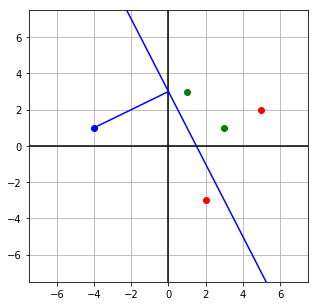

/\ /\ /\ Using w = (6, -4, -2), point: (1, 3, 1) is misclassified /\ /\ /\


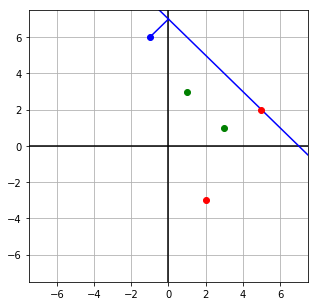

/\ /\ /\ Using w = (7, -1, -1), point: (1, 5, 2) is misclassified /\ /\ /\


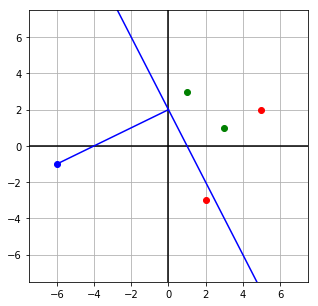

/\ /\ /\ Using w = (6, -6, -3), point: (1, 3, 1) is misclassified /\ /\ /\


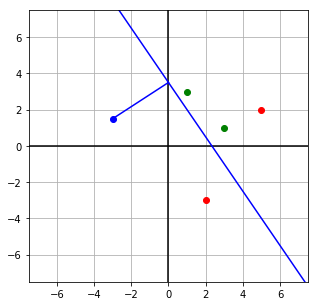

/\ /\ /\ Using w = (7, -3, -2), point: (1, 3, 1) is misclassified /\ /\ /\


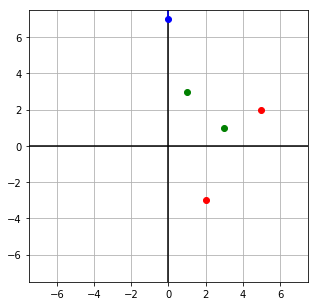

/\ /\ /\ Using w = (8, 0, -1), point: (1, 5, 2) is misclassified /\ /\ /\


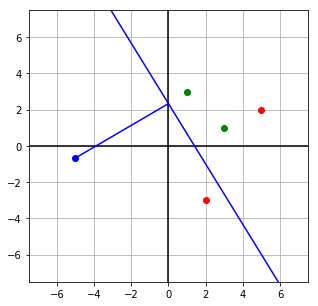

/\ /\ /\ Using w = (7, -5, -3), point: (1, 3, 1) is misclassified /\ /\ /\


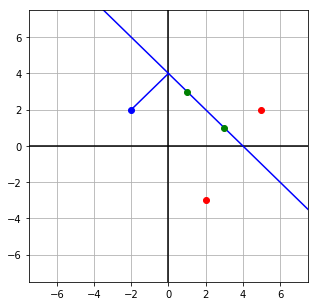

/\ /\ /\ Using w = (8, -2, -2), point: (1, 3, 1) is misclassified /\ /\ /\


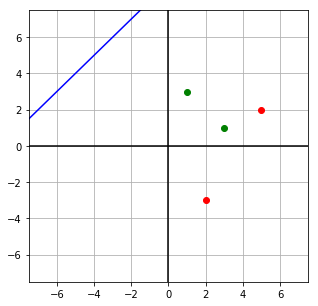

/\ /\ /\ Using w = (9, 1, -1), point: (1, 5, 2) is misclassified /\ /\ /\


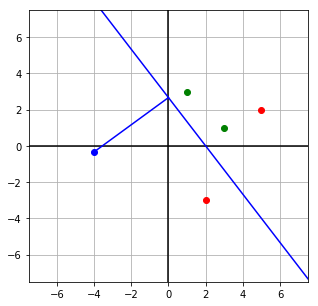

/\ /\ /\ Using w = (8, -4, -3), point: (1, 3, 1) is misclassified /\ /\ /\


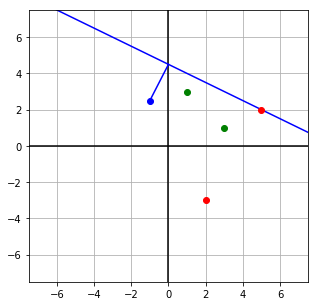

/\ /\ /\ Using w = (9, -1, -2), point: (1, 5, 2) is misclassified /\ /\ /\


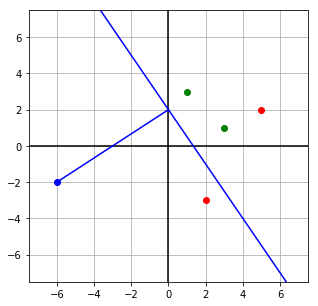

/\ /\ /\ Using w = (8, -6, -4), point: (1, 3, 1) is misclassified /\ /\ /\


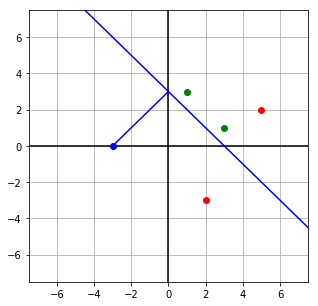

/\ /\ /\ Using w = (9, -3, -3), point: (1, 3, 1) is misclassified /\ /\ /\


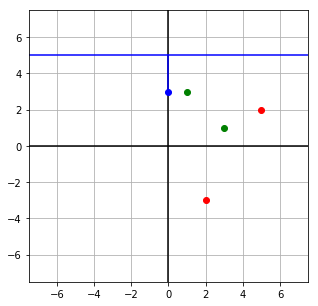

/\ /\ /\ Using w = (10, 0, -2), point: (1, 5, 2) is misclassified /\ /\ /\


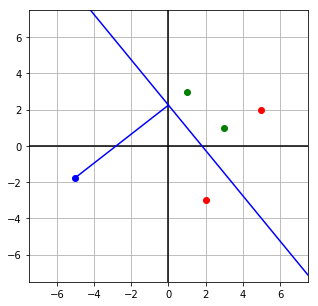

/\ /\ /\ Using w = (9, -5, -4), point: (1, 3, 1) is misclassified /\ /\ /\


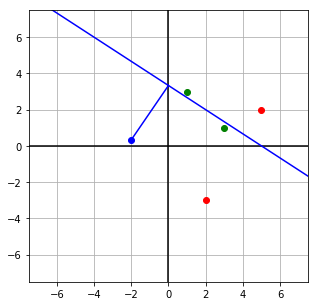

/\ /\ /\ Using w = (10, -2, -3), point: (1, 1, 3) is misclassified /\ /\ /\


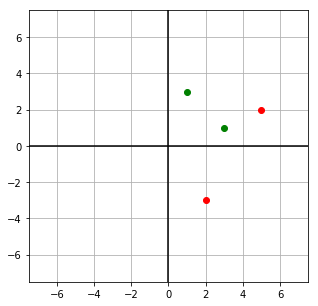

/\ /\ /\ Using w = (11, -1, 0), point: (1, 5, 2) is misclassified /\ /\ /\


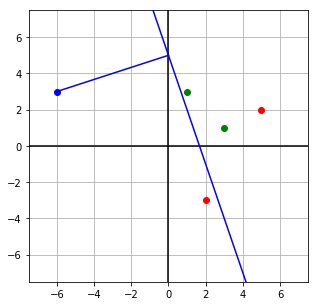

/\ /\ /\ Using w = (10, -6, -2), point: (1, 3, 1) is misclassified /\ /\ /\


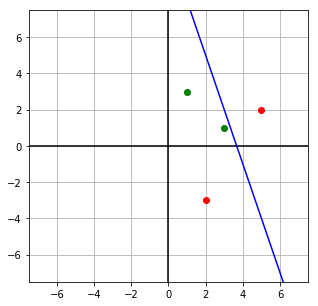

/\ /\ /\ Using w = (11, -3, -1), point: (1, 2, -3) is misclassified /\ /\ /\


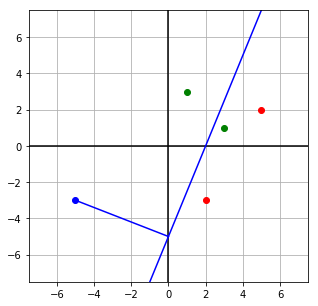

/\ /\ /\ Using w = (10, -5, 2), point: (1, 3, 1) is misclassified /\ /\ /\


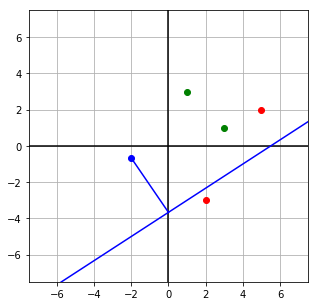

/\ /\ /\ Using w = (11, -2, 3), point: (1, 5, 2) is misclassified /\ /\ /\


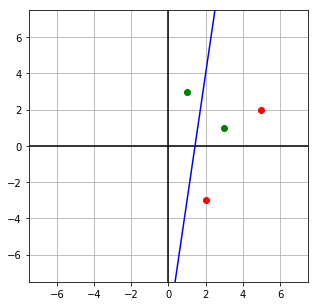

/\ /\ /\ Using w = (10, -7, 1), point: (1, 3, 1) is misclassified /\ /\ /\


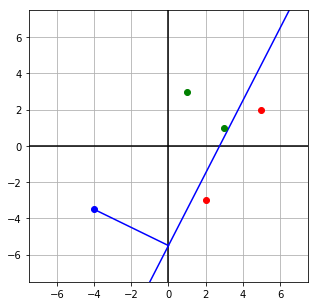

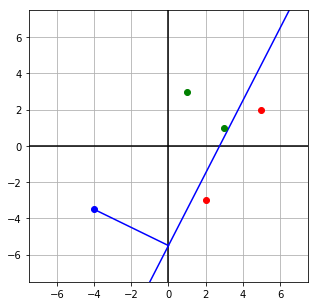

(11, -4, 2)

In [5]:
inhomogeneous_perceptron(S)